## Import libraries 
1) PIL to load images <br>
2) h5py is library to load h5 type dataset<br>

What is h5 dataset ?

An H5 is one of the Hierarchical Data Formats (HDF) used to store large amount of data. It is used to store large amount of data in the form of multidimensional arrays. The format is primarily used to store scientific data that is well-organized for quick retrieval and analysis.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
import h5py
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
import random
%matplotlib inline



In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Loading H5 Dataset 
1. Loading dataset seperating into train and test and classes 
2. Printing dataset to see best resolution

In [ ]:
def load_dataset():
    train_dataset = h5py.File('/content/drive/MyDrive/ADS-2/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('/content/drive/MyDrive/ADS-2/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [ ]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

In [ ]:
print("The classes are labelled as for 0:- "+ classes[0].decode("utf-8") +" and for 1:- " + classes[1].decode("utf-8"))

The classes are labelled as for 0:- non-cat and for 1:- cat


y = [1], it's a 'cat' picture.


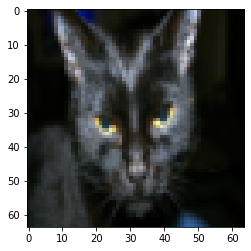

In [ ]:
# Example of a picture
index = 25
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")

y = [0], it's a 'non-cat' picture.


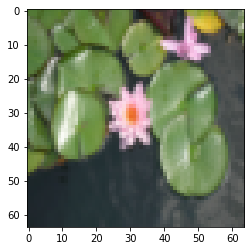

In [ ]:
# Example of a picture
index = 26
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")

In [ ]:
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


## Flatten and resize data
We flattened the Images to resize and reshape x and y of both train and test 
(num_px, num_px, 3) = (64,64,3)

In [ ]:
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

In [ ]:
print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)


## Center and standardizing the data 
To represent color images, the red, green and blue channels (RGB) must be specified for each pixel, and so the pixel value is actually a vector of three numbers ranging from 0 to 255.

So dividing data by 255 to standardize the data

In [ ]:
train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.

In [ ]:
test_set_x.shape

(12288, 50)

In [ ]:
train_set_x.shape

(12288, 209)

## Algorithm Approach Explained :

1. Initialize weights randomly

2. Forward Prop 
        Z1= W1*A0+B1
        A1=(f(Z1)

3. Find value of Cost ( Log Loss / MSE) 

4. Backward Prop
        W2=W2-alpha * (derv(cost)/derv(W2))
        B2=B2-alpha * (derv(cost/derv(B2)

5. Repeat Step 2,3,4 for n iterations

Here is the flow of our algo the upward section going to right arrow is forward prop and below one is backward prop

![Abc](https://drive.google.com/uc?export=view&id=1EInMFR1T4rIfBQsAae3rQ4nS0Xp56FqG)

![Abc](https://drive.google.com/uc?export=view&id=1Y88cNyoQxzzwzdHIwFQFT0KQtdkrijwW)


## Activation Function


In [ ]:
def sigmoid(z):
    """
    Arguments:
    z -- A scalar or numpy array of any size.
    """
    s = 1 / (1 + np.exp(-z))
    return s

def ReLU(z):
    return np.maximum(z, 0)


## used relu derivative for backward proporgation
def ReLU_deriv(z):
    return z > 0



True

## Initializing parameters


In [ ]:
def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    
    w = np.zeros((dim, 1))
    b = 0

    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b
dim = 2
w, b = initialize_with_zeros(dim)
print ("w = " + str(w))
print ("b = " + str(b))

w = [[0.]
 [0.]]
b = 0


##Propogate :
Forward and backward propogation is covered here with cost/loss function : 
We have two activation function Sigmoid and Relu for that we are using different loss function. <br>
Why ?<br>
I tried log loss function with Sigmoid but it was not good practice to do that and also proven and learned from it that accuracy was really low and model was underfiiting due to that issue. <br>
So we are using mean square error with Relu and log loss with Sigmoid.<br>

Link which I referred and to support my above statement: <br>
https://datascience.stackexchange.com/questions/86308/loss-function-for-relu-elu-selu

In [ ]:
def propagate(w, b, X, Y,activation='sigmoid'):
    """
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    """
    
    m = X.shape[1]
    
    # FORWARD PROPAGATION (FROM X TO COST)

   
    if(activation=='sigmoid'):
      A = sigmoid(np.dot(w.T, X)+b)                           # compute activation, size (1, number of examples)
      cost = -(1/m)*(np.dot(Y, np.log(A).T)+np.dot(1-Y, np.log(1-A).T)) # compute cost
      
      dw = (1/m)*np.dot(X, (A-Y).T)
      db = (1/m)*np.sum(A-Y)

    elif(activation=='relu'):
       Z1 = w.T.dot(X) + b
       A = ReLU(Z1)
       cost=mean_squared_error(Y, 1-Y)

       # backward prop 
       dw = (1/m)*np.dot(X, (A-Y).T)
       db = (1/m)*np.sum(A-Y)
       Z2=dw.T.dot(X)+b
       A=ReLU_deriv(Z2)
       
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    return grads, cost

In [ ]:
w, b, X, Y = np.array([[1],[2]]), 2, np.array([[1,2],[3,4]]), np.array([[1,0]])

b = np.squeeze(np.asarray(b))

print(X.shape)
grads, cost = propagate(w, b, X, Y,'relu')
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

(2, 2)
dw = [[16.]
 [36.]]
db = 10.0
cost = 1.0


##Stochastic Gradient Descent Optimization

In [ ]:
def sgd_optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False,activation='sigmoid'):
    """
    This function optimizes w and b by running a stochastic gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    """
    
    costs = []
    np.random.shuffle(X)
    np.random.shuffle(Y)

    for i in range(num_iterations):
        
        
        # Cost and gradient calculation
        grads, cost = propagate(w, b, X, Y,activation)
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        ### START CODE HERE ###
        w = w - learning_rate * dw
        b = b - learning_rate * db
        ### END CODE HERE ###
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 1000 training examples
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [ ]:
params, grads, costs = sgd_optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = True,activation='relu')
print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

Cost after iteration 0: 1.000000
w = [[-0.08140605]
 [-0.24334521]]
b = 1.419030420562572
dw = [[ 0.08670598]
 [-0.02296021]]
db = -0.05483309171519252


## Predict Function : 

In [ ]:
def predict(w, b, X,activation='sigmoid'):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    if activation=='relu':
      Z1 = w.T.dot(X) + b
      A = ReLU(Z1)
    elif activation=='sigmoid':
      A = sigmoid(np.dot(w.T,X) + b)
    
    for i in range(A.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        if (A[0,i] <=0.5):
            Y_prediction[0,i] = 0
        elif (A[0,i] > 0.5):
            Y_prediction[0,i] = 1
        pass
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

In [ ]:
print(w)
print ("predictions = " + str(predict(w, b, X,'relu')))

[[1]
 [2]]
predictions = [[1. 1.]]


##Assemble Model

In [ ]:
# GRADED FUNCTION: model

def model(X_train, Y_train, X_test, Y_test, num_iterations = 4000, learning_rate = 0.50, print_cost = False,activation='sigmoid'):
    """    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """    
    # initialize parameters with zeros 
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent 
    parameters, grads, costs = sgd_optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost,activation)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)


    # Printing train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [ ]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 11000, learning_rate = 0.001, print_cost = True,activation='relu')

Cost after iteration 0: 1.000000
Cost after iteration 1000: 1.000000
Cost after iteration 2000: 1.000000
Cost after iteration 3000: 1.000000
Cost after iteration 4000: 1.000000
Cost after iteration 5000: 1.000000
Cost after iteration 6000: 1.000000
Cost after iteration 7000: 1.000000
Cost after iteration 8000: 1.000000
Cost after iteration 9000: 1.000000
Cost after iteration 10000: 1.000000
train accuracy: 74.16267942583733 %
test accuracy: 66.0 %


## Some Random selection of images  to predict

Index No: 15 y = 1, you predicted that it is a "cat" picture.


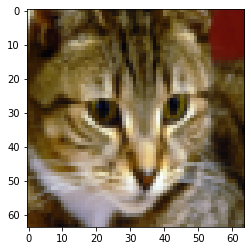

In [ ]:
index = random.randint(0,49)
plt.imshow(test_set_x[:,index].reshape((num_px, num_px, 3)))
val=d["Y_prediction_test"][0,index]
val=int(val)
val=classes[val]
val=val.decode("utf-8")
print ("Index No: " + str(index) +  " y = " + str(test_set_y[0,index]) + ", you predicted that it is a \"" + val +  "\" picture.")

Index No: 11 y = 1, you predicted that it is a "cat" picture.


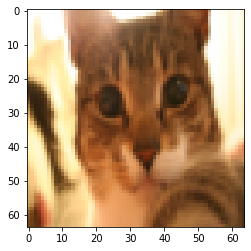

In [ ]:
index = random.randint(0,49)
plt.imshow(test_set_x[:,index].reshape((num_px, num_px, 3)))
val=d["Y_prediction_test"][0,index]
val=int(val)
val=classes[val]
val=val.decode("utf-8")
print ("Index No: " + str(index) +  " y = " + str(test_set_y[0,index]) + ", you predicted that it is a \"" + val +  "\" picture.")

Index No: 15 y = 1, you predicted that it is a "cat" picture.


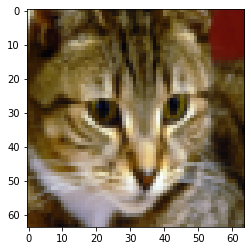

In [ ]:
index = random.randint(0,49)
plt.imshow(test_set_x[:,index].reshape((num_px, num_px, 3)))
val=d["Y_prediction_test"][0,index]
val=int(val)
val=classes[val]
val=val.decode("utf-8")
print ("Index No: " + str(index) +  " y = " + str(test_set_y[0,index]) + ", you predicted that it is a \"" + val +  "\" picture.")

Index No: 25 y = 1, you predicted that it is a "cat" picture.


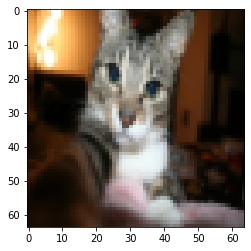

In [ ]:
index = random.randint(0,49)
plt.imshow(test_set_x[:,index].reshape((num_px, num_px, 3)))
val=d["Y_prediction_test"][0,index]
val=int(val)
val=classes[val]
val=val.decode("utf-8")
print ("Index No: " + str(index) +  " y = " + str(test_set_y[0,index]) + ", you predicted that it is a \"" + val +  "\" picture.")

Index No: 27 y = 0, you predicted that it is a "cat" picture.


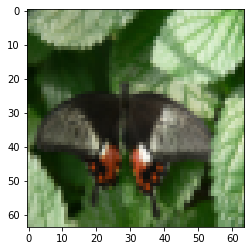

In [ ]:
index = random.randint(0,49)
plt.imshow(test_set_x[:,index].reshape((num_px, num_px, 3)))
val=d["Y_prediction_test"][0,index]
val=int(val)
val=classes[val]
val=val.decode("utf-8")
print ("Index No: " + str(index) +  " y = " + str(test_set_y[0,index]) + ", you predicted that it is a \"" + val +  "\" picture.")

Index No: 10 y = 1, you predicted that it is a "cat" picture.


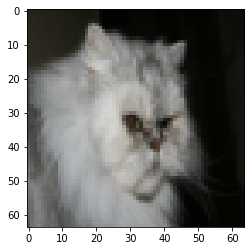

In [ ]:
index = random.randint(0,50)
plt.imshow(test_set_x[:,index].reshape((num_px, num_px, 3)))
val=d["Y_prediction_test"][0,index]
val=int(val)
val=classes[val]
val=val.decode("utf-8")
print ("Index No: " + str(index) +  " y = " + str(test_set_y[0,index]) + ", you predicted that it is a \"" + val +  "\" picture.")

##F1 Score	Interpretation

> 0.9	Very good <br>
0.8 - 0.9	Good <br>
0.5 - 0.8	OK. <br>
< 0.5	Not good. <br>


We got 0.79 Thats GOOD SCORE

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
f1_score(test_set_y,d["Y_prediction_test"], average='micro')

0.7951807228915663

## Minimum Error : Mean square Error (Checking Accuracy)

In [ ]:
print('Mean Squared Error :',mean_squared_error(test_set_y, d["Y_prediction_test"]))

Mean Squared Error : 0.34


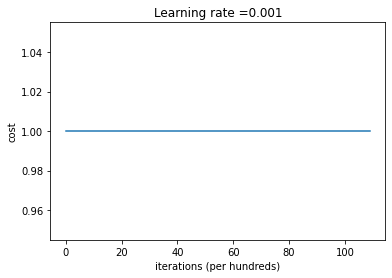

In [ ]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

## Lets find best learning rate for our model

ReLu

learning rate is: 0.01
train accuracy: 65.55023923444976 %
test accuracy: 34.0 %

-------------------------------------------------------

learning rate is: 0.001
train accuracy: 74.16267942583733 %
test accuracy: 66.0 %

-------------------------------------------------------

learning rate is: 0.0001
train accuracy: 50.717703349282296 %
test accuracy: 66.0 %

-------------------------------------------------------



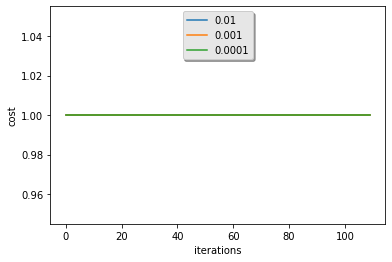

In [ ]:
learning_rates = [0.01,0.001, 0.0001]
#learning_rates = [0.001]

models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 11000, learning_rate = i, print_cost = False,activation="relu")
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

<h4>Sigmoid </h4>

learning rate is: 0.01
train accuracy: 100.0 %
test accuracy: 70.0 %

-------------------------------------------------------

learning rate is: 0.001
train accuracy: 99.04306220095694 %
test accuracy: 54.0 %

-------------------------------------------------------

learning rate is: 0.0001
train accuracy: 86.60287081339713 %
test accuracy: 28.0 %

-------------------------------------------------------



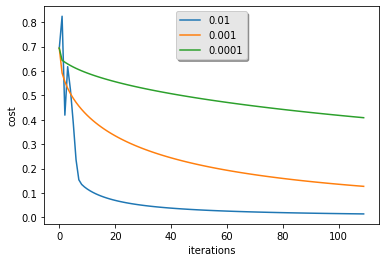

In [ ]:
learning_rates = [0.01,0.001, 0.0001]
#learning_rates = [0.001]

models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 11000, learning_rate = i, print_cost = False,activation="sigmoid")
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

## Images outside dataset to predict

y = 1.0, your algorithm predicts a "cat" picture.


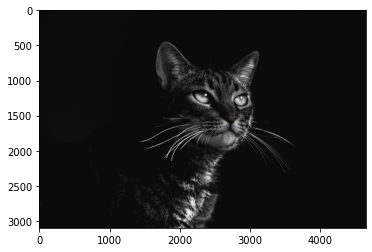

In [ ]:
import imageio
from skimage.transform import resize

## START CODE HERE ## (PUT YOUR IMAGE NAME) 
my_image = "/content/drive/MyDrive/ADS-2/cat_test-1.jpeg"   # change this to the name of your image file 
## END CODE HERE ##

# We preprocess the image to fit your algorithm.

fname = my_image
image = np.array(imageio.imread(fname))
my_image = resize(image, (num_px,num_px)).reshape((1, num_px*num_px*3)).T
my_predicted_image = predict(d["w"], d["b"], my_image)

plt.imshow(image)
print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")


y = 1.0, your algorithm predicts a "cat" picture.


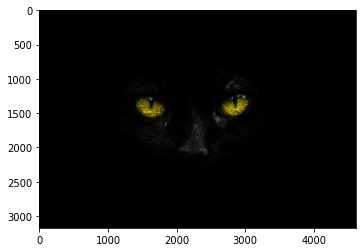

In [ ]:
import imageio
from skimage.transform import resize

## START CODE HERE ## (PUT YOUR IMAGE NAME) 
my_image = "/content/drive/MyDrive/ADS-2/cat_test-2.jpg"   # change this to the name of your image file 
## END CODE HERE ##

# We preprocess the image to fit your algorithm.

fname = my_image
image = np.array(imageio.imread(fname))
my_image = resize(image, (num_px,num_px)).reshape((1, num_px*num_px*3)).T
my_predicted_image = predict(d["w"], d["b"], my_image)

plt.imshow(image)
print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")

References and citations -
1. Andrew NG Deep Learning https://www.coursera.org/specializations/deep-learning
2. Gradient Descent https://medium.com/@raushankiitd/gradient-descent-algorithm-in-machine-learning-from-0-to-advanced-level-with-types-pseudocode-4b3f29252baa
3. Forward and backward prop : https://www.youtube.com/watch?v=Tb23YtZ92AE&t=318s&ab_channel=CodingLane
4. CNN from Scratch : https://www.youtube.com/watch?v=w8yWXqWQYmU&t=426s&ab_channel=SamsonZhang
